# ***TAREA 1 INTELIGENCIA ARTIFICIAL***
**Parte 2**

* En primer lugar se calculan las probabilidades de estar escuchando Manowar, Blind Guardian y Helloween, después de 200, 500 y 1000 canciones. Todo esto mediante una caminata aleatoria.

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# Matriz de transición que representa las probabilidades de cambiar de una canción a otra.
song_prob = np.array([[0.27, 0.13, 0.09, 0.02, 0.10, 0.11, 0.15, 0.13],
                      [0.17, 0.18, 0.00, 0.15, 0.14, 0.13, 0.12, 0.11],
                      [0.15, 0.13, 0.05, 0.07, 0.11, 0.19, 0.19, 0.11],
                      [0.19, 0.11, 0.15, 0.15, 0.12, 0.11, 0.12, 0.05],
                      [0.11, 0.20, 0.17, 0.14, 0.18, 0.11, 0.07, 0.02],
                      [0.07, 0.12, 0.11, 0.12, 0.27, 0.09, 0.03, 0.19],
                      [0.15, 0.10, 0.12, 0.08, 0.18, 0.07, 0.14, 0.16],
                      [0.21, 0.09, 0.06, 0.13, 0.05, 0.17, 0.08, 0.21]])

# Lista de nombres de canciones
songs = ['Helloween', 'Angra', 'Stratovarius', 'Avantasia', 'Manowar', 'Liquid Tension Experiment', 'Blind Guardian', 'Hammerfall']

* Función que realiza la caminata aleatoria para ver como evoluciona la probabilidad de escuchar cada canción.

In [29]:
def random_walk(inicio, iteraciones, song_prob):
    contador = [0, 0, 0, 0, 0, 0, 0, 0]
    camino = [inicio]
    i = inicio
    for _ in range(iteraciones):
        i = np.random.choice(8, p=song_prob[i])
        contador[i] += 1
        camino.append(i)

    prob = [cont / iteraciones for cont in contador]

    return prob

In [37]:
# Realiza la caminata aleatoria desde "Blind Guardian" (índice 6) para diferentes números de iteraciones
num_iteraciones = [200, 500, 1000]
resultados = []

for it in num_iteraciones:
    probabilidad = random_walk(6, it, song_prob)
    resultados.append(probabilidad)

Sacar las probabilidades de las canciones Manowar, Blind Guardian y Helloween.

In [40]:
# Prepara las probabilidades para las canciones específicas
manowar_probabilidades = [res[4] for res in resultados]
print(manowar_probabilidades)
blind_guardian_probabilidades = [res[6] for res in resultados]
print(blind_guardian_probabilidades)
helloween_probabilidades = [res[0] for res in resultados]
print(helloween_probabilidades)

[0.21, 0.136, 0.145]
[0.055, 0.106, 0.1]
[0.195, 0.166, 0.178]


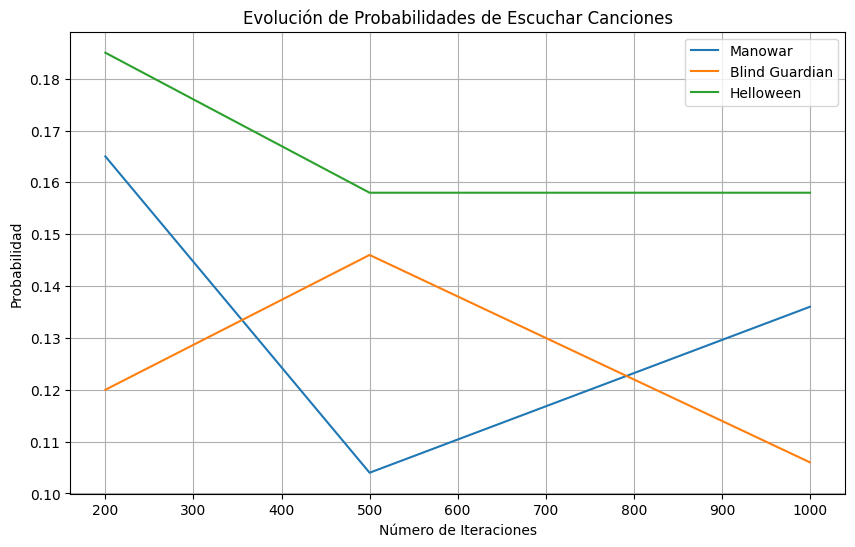

In [20]:
# Grafica las probabilidades a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(num_iteraciones, manowar_probabilidades, label='Manowar')
plt.plot(num_iteraciones, blind_guardian_probabilidades, label='Blind Guardian')
plt.plot(num_iteraciones, helloween_probabilidades, label='Helloween')
plt.xlabel('Número de Iteraciones')
plt.ylabel('Probabilidad')
plt.title('Evolución de Probabilidades de Escuchar Canciones')
plt.legend()
plt.grid(True)
plt.show()

Se observa que pasada una cierta cantidad de iteraciones las probabilidades de escuchar las canciones convergen, mientras más iteraciones más precisa será la probabilidad.

* Luego, se calculan las probabilidades de escuchar esas canciones utilizando estas dos ecuaciones:
$$
\pi_0 \cdot T = \pi_1
$$
$$
\sum_{i=1}^{N} \pi_i = 1
$$

In [41]:
import numpy as np

# Matriz de transición
song_prob = np.array([[0.27, 0.13, 0.09, 0.02, 0.10, 0.11, 0.15, 0.13],
                      [0.17, 0.18, 0.00, 0.15, 0.14, 0.13, 0.12, 0.11],
                      [0.15, 0.13, 0.05, 0.07, 0.11, 0.19, 0.19, 0.11],
                      [0.19, 0.11, 0.15, 0.15, 0.12, 0.11, 0.12, 0.05],
                      [0.11, 0.20, 0.17, 0.14, 0.18, 0.11, 0.07, 0.02],
                      [0.07, 0.12, 0.11, 0.12, 0.27, 0.09, 0.03, 0.19],
                      [0.15, 0.10, 0.12, 0.08, 0.18, 0.07, 0.14, 0.16],
                      [0.21, 0.09, 0.06, 0.13, 0.05, 0.17, 0.08, 0.21]])

# Estado inicial en "Blind Guardian" (índice 6)
estado_actual = np.array([0, 0, 0, 0, 0, 0, 1, 0])

for _ in range(10000):
    estado_actual = np.dot(estado_actual, song_prob)

print("Estado estacionario:")
print(estado_actual)
# Probabilidad de Manowar (índice 4), Blind Guardian (índice 6) y Helloween (índice 0)
probabilidad_manowar = estado_actual[4]
probabilidad_blind_guardian = estado_actual[6]
probabilidad_helloween = estado_actual[0]
print("Probabilidad de Manowar:", probabilidad_manowar)
print("Probabilidad de Blind Guardian:", probabilidad_blind_guardian)
print("Probabilidad de Helloween:", probabilidad_helloween)

# Comprobación de la ecuación de la suma
suma_pi = np.sum(estado_actual)
if np.isclose(suma_pi, 1):
    print("La ecuación de la suma de todos los pi_i desde 1 hasta N se cumple.")
else:
    print("La ecuación de la suma de todos los pi_i desde 1 hasta N no se cumple.")


Estado estacionario:
[0.16912007 0.13528795 0.0939366  0.10524766 0.14322865 0.12065996
 0.11098678 0.12153233]
Probabilidad de Manowar: 0.14322864742559516
Probabilidad de Blind Guardian: 0.11098677815624744
Probabilidad de Helloween: 0.16912007137246732
La ecuación de la suma de todos los pi_i desde 1 hasta N se cumple.


* Comparación

Para esta última parte se realizan 10000 iteraciones para determinar el estado estacionario lo más preciso posible. Las probabilidades de escuchar las canciones son las siguientes:

Manowar: 0.14322864742559516

Blind Guardian: 0.11098677815624744

Helloween: 0.16912007137246732

Las probabilidades obtenidas anteriormente, que se pueden ver en el grafico difieren de estas más o menos dependiendo de la ejecución, ya que es aleatorio, pero lo que se puede ver es que a medida van aumentando las iteraciones más se acerca a estas últimas probabilidades.